# AGE AND GENDER PREDICTION

<img src='New.png' style="width:800px;height:500px" />

## Group Members:-

- **Nikhil Chawla(18csu140)**
- **Palak Dhingra(18csu151)**
- **Pranav Goel(18csu158)**

## Mentor:-

- **Mr. Arpit Yadav**
- **Dr. Shaveta Arora**

## Project Description:-

**Automatic age and gender classification has become relevant to an increasing amount of applications, particularly since the rise of social platforms and social media. In this project an Age and Gender prediction model is build. The basic idea behind this project was to be able to understand the concepts of deep learning and neural networks. With the advancement of technologies new features are added to our current using applications. One of such fun feature is to detect gender and age of a person who faces the camera at any instance. With the help of this project we tried to create a similar experience.**

## Dataset Description:-

**The Adience dataset, published in 2014, contains 26,580 photos across 2,284 subjects with a binary gender label and one label from eight different age groups, partitioned into five splits. The key principle of the data set is to capture the images as close to real world conditions as possible, including all variations in appearance, pose, lighting condition and image quality, to name a few.**

## Steps invoved:-

- **Importing libraries and dataset**
- **Getting to know the data**
- **Data pre-processing**
- **Splitting dataset**
- **Applying VGG16 model for Gender**
- **Applying VGG16 model for Age**
- **Model evaluation**

## 1. Mounting Drive

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Importing library and dataset

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Project/fold_0_data.txt",sep = "\t" )
data1 = pd.read_csv("/content/drive/MyDrive/Project/fold_1_data.txt",sep = "\t")
data2 = pd.read_csv("/content/drive/MyDrive/Project/fold_2_data.txt",sep = "\t")
data3 = pd.read_csv("/content/drive/MyDrive/Project/fold_3_data.txt",sep = "\t")
data4 = pd.read_csv("/content/drive/MyDrive/Project/fold_4_data.txt",sep = "\t")

In [4]:
data

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...
4479,68094148@N04,11373794746_4720ac792a_o.jpg,478,"(25, 32)",m,664,0,242,211,-5,-15,73
4480,68094148@N04,11355711315_0f5b5da125_o.jpg,477,"(25, 32)",f,915,51,109,112,0,45,14
4481,10693681@N00,9162730346_b1bf71120a_o.jpg,479,"(25, 32)",m,2145,1270,249,249,10,30,25
4482,113830953@N04,11855529986_dff116e018_o.jpg,480,None,NaN,2878,1300,306,306,-100,0,164


## 3. Getting to know the data

In [5]:
data.columns

Index(['user_id', 'original_image', 'face_id', 'age', 'gender', 'x', 'y', 'dx',
       'dy', 'tilt_ang', 'fiducial_yaw_angle', 'fiducial_score'],
      dtype='object')

In [6]:
total_data = pd.concat([data, data1, data2, data3, data4], ignore_index=True)
print(data.shape)
print(total_data.shape)

(4484, 12)
(19370, 12)


In [7]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             19370 non-null  object
 1   original_image      19370 non-null  object
 2   face_id             19370 non-null  int64 
 3   age                 19370 non-null  object
 4   gender              18591 non-null  object
 5   x                   19370 non-null  int64 
 6   y                   19370 non-null  int64 
 7   dx                  19370 non-null  int64 
 8   dy                  19370 non-null  int64 
 9   tilt_ang            19370 non-null  int64 
 10  fiducial_yaw_angle  19370 non-null  int64 
 11  fiducial_score      19370 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.8+ MB


In [8]:
data.describe()

,face_id,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
count,4484.000000,4484.000000,4484.000000,4484.000000,4484.000000,4484.000000,4484.000000,4484.000000
mean,181.365299,888.913024,664.133586,730.582516,722.762935,-8.220785,3.408787,74.749554
std,146.967930,641.385657,460.556195,505.217378,478.369254,84.321376,15.410016,39.049674
min,1.000000,0.000000,0.000000,100.000000,100.000000,-200.000000,-45.000000,5.000000
25%,18.000000,364.000000,298.000000,388.000000,389.000000,-85.000000,0.000000,44.000000
50%,186.000000,793.000000,618.000000,617.000000,613.000000,-5.000000,0.000000,72.000000
75%,319.250000,1316.000000,976.500000,854.000000,854.250000,10.000000,0.000000,101.000000
max,480.000000,4983.000000,2752.000000,3264.000000,3225.000000,270.000000,45.000000,206.000000


f    9372
m    8120
u    1099
Name: gender, dtype: int64


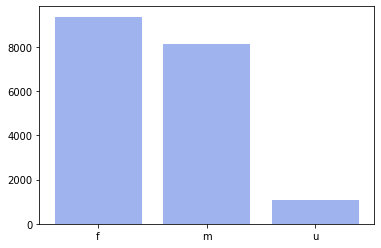

In [9]:
#bar chart
gender = ['f','m','u']
plt.bar(gender, total_data.gender.value_counts(), color='royalblue',align='center', alpha=0.5)
print(total_data.gender.value_counts())
plt.show()

In [10]:
df = total_data[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy()

In [11]:
img_path = []
for row in total_data.iterrows():
    path = "/content/drive/MyDrive/Project/faces/"+row[1].user_id+"/coarse_tilt_aligned_face."+str(row[1].face_id)+"."+row[1].original_image
    img_path.append(path)

df['img_path'] = img_path
df.head()

,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",f,0,414,1086,1383,/content/drive/MyDrive/Project/faces/30601258@...
1,"(25, 32)",m,301,105,640,641,/content/drive/MyDrive/Project/faces/30601258@...
2,"(25, 32)",f,2395,876,771,771,/content/drive/MyDrive/Project/faces/30601258@...
3,"(25, 32)",m,752,1255,484,485,/content/drive/MyDrive/Project/faces/30601258@...
4,"(25, 32)",m,175,80,769,768,/content/drive/MyDrive/Project/faces/30601258@...


In [12]:
#mapping ages
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]
age_mapping_dict = {each[0]: each[1] for each in age_mapping}
drop_labels = []
for idx, each in enumerate(df.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        df.age.loc[idx] = age_mapping_dict[each]
                
df = df.drop(labels=drop_labels, axis=0) #droped None values

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
df=df.dropna()
df.head()

,age,gender,x,y,dx,dy,img_path
0,25-32,f,0,414,1086,1383,/content/drive/MyDrive/Project/faces/30601258@...
1,25-32,m,301,105,640,641,/content/drive/MyDrive/Project/faces/30601258@...
2,25-32,f,2395,876,771,771,/content/drive/MyDrive/Project/faces/30601258@...
3,25-32,m,752,1255,484,485,/content/drive/MyDrive/Project/faces/30601258@...
4,25-32,m,175,80,769,768,/content/drive/MyDrive/Project/faces/30601258@...


In [14]:
unbiased_data = df[df.gender != 'u'].copy()
unbiased_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452 entries, 0 to 19345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       17452 non-null  object
 1   gender    17452 non-null  object
 2   x         17452 non-null  int64 
 3   y         17452 non-null  int64 
 4   dx        17452 non-null  int64 
 5   dy        17452 non-null  int64 
 6   img_path  17452 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


## 4. Pre-processing

In [15]:
gender_to_label_map = {
    'f' : 0,
    'm' : 1
}

age_to_label_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}

unbiased_data['age'] = unbiased_data['age'].apply(lambda age: age_to_label_map[age])
unbiased_data['gender'] = unbiased_data['gender'].apply(lambda g: gender_to_label_map[g])

unbiased_data.head()

,age,gender,x,y,dx,dy,img_path
0,4,0,0,414,1086,1383,/content/drive/MyDrive/Project/faces/30601258@...
1,4,1,301,105,640,641,/content/drive/MyDrive/Project/faces/30601258@...
2,4,0,2395,876,771,771,/content/drive/MyDrive/Project/faces/30601258@...
3,4,1,752,1255,484,485,/content/drive/MyDrive/Project/faces/30601258@...
4,4,1,175,80,769,768,/content/drive/MyDrive/Project/faces/30601258@...


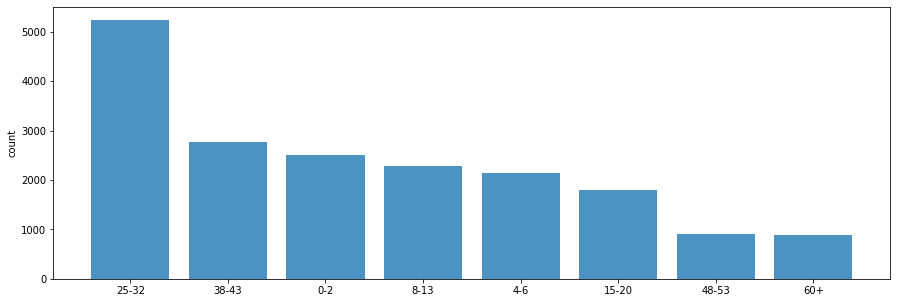

25-32    5242
38-43    2776
0-2      2509
8-13     2287
4-6      2140
15-20    1792
48-53     909
60+       896
Name: age, dtype: int64

In [16]:
age = ['25-32','38-43','0-2','8-13','4-6','15-20','48-53','60+']
plt.figure(figsize=(15, 5)) 
plt.bar(age, df.age.value_counts(), alpha=0.8)
plt.ylabel('count')
plt.show()
df.age.value_counts()

## 5. Splitting dataset

In [17]:
X = unbiased_data[['img_path']]
y = unbiased_data[['gender']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

Train data shape (13961, 1)
Test data shape (3491, 1)


In [18]:
y_train.head(5)

,gender
17123,0
7211,1
14902,0
2083,0
15288,1


In [19]:
y_test.head()

,gender
16807,1
1355,1
2568,1
19,1
14275,1


In [20]:
from PIL import Image
train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((224,224))   
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((224, 224))  
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train images shape (13961, 224, 224, 3)
Test images shape (3491, 224, 224, 3)


## 6. Applying VGG16 model for Gender

In [21]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [22]:
for layer in base_model.layers:
    layer.trainable = False

In [23]:
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [24]:
from tensorflow.keras import layers

In [62]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])


In [63]:
vgghist = model.fit(train_images, y_train, epochs = 5, validation_split = 0.2)


Epoch 1/5
349/349 [==============================] - 56s 159ms/step - loss: 3.1394 - acc: 0.7302 - val_loss: 0.6534 - val_acc: 0.8092
Epoch 2/5
349/349 [==============================] - 58s 167ms/step - loss: 0.3506 - acc: 0.8947 - val_loss: 0.5980 - val_acc: 0.8650
Epoch 3/5
349/349 [==============================] - 58s 167ms/step - loss: 0.2302 - acc: 0.9358 - val_loss: 0.6275 - val_acc: 0.8808
Epoch 4/5
349/349 [==============================] - 58s 168ms/step - loss: 0.1168 - acc: 0.9671 - val_loss: 0.7580 - val_acc: 0.8894
Epoch 5/5
349/349 [==============================] - 59s 169ms/step - loss: 0.0982 - acc: 0.9737 - val_loss: 0.8594 - val_acc: 0.8836


In [64]:
model.metrics_names

['loss', 'acc']

In [65]:
losses = pd.DataFrame(model.history.history)

In [66]:
print(model.metrics_names)
print(model.evaluate(test_images,y_test,verbose=0))


['loss', 'acc']
[0.7034703493118286, 0.8963047862052917]


## 7. Applying VGG16 model for Age

In [84]:
X = unbiased_data[['img_path']]
y = unbiased_data[['age']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

Train data shape (13961, 1)
Test data shape (3491, 1)


In [85]:
y_train.head(5)

,age
17123,6
7211,6
14902,4
2083,5
15288,4


In [86]:
y_test.head()

,age
16807,1
1355,0
2568,5
19,4
14275,4


In [87]:
from PIL import Image
train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((224,224))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((224, 224))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train images shape (13961, 224, 224, 3)
Test images shape (3491, 224, 224, 3)


In [88]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [89]:
for layer in base_model.layers:
    layer.trainable = False

In [90]:
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [91]:
from tensorflow.keras import layers

In [92]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(8, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'sparse_categorical_crossentropy',metrics = ['acc'])

In [93]:
vgghist = model.fit(train_images, y_train, epochs = 5, validation_split = 0.2)


Epoch 1/5
349/349 [==============================] - 54s 152ms/step - loss: 7.8352 - acc: 0.2843 - val_loss: 1.6296 - val_acc: 0.4135
Epoch 2/5
349/349 [==============================] - 56s 159ms/step - loss: 1.5980 - acc: 0.4672 - val_loss: 1.7496 - val_acc: 0.4586
Epoch 3/5
349/349 [==============================] - 58s 167ms/step - loss: 1.2854 - acc: 0.5832 - val_loss: 1.6636 - val_acc: 0.5231
Epoch 4/5
349/349 [==============================] - 58s 167ms/step - loss: 1.0186 - acc: 0.6846 - val_loss: 1.7948 - val_acc: 0.5474
Epoch 5/5
349/349 [==============================] - 59s 168ms/step - loss: 0.8112 - acc: 0.7547 - val_loss: 2.0544 - val_acc: 0.5725


In [94]:
model.metrics_names

['loss', 'acc']

In [95]:
losses = pd.DataFrame(model.history.history)

In [96]:
print(model.metrics_names)
print(model.evaluate(test_images,y_test,verbose=0))


['loss', 'acc']
[2.0948915481567383, 0.5691778659820557]


## Thank you